In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low= -180.000, high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [32]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [33]:
# Import Citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [34]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [35]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
    
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key    

# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [36]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count}| {city}") 
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1| maumere
Processing Record 2 of Set 1| attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1| san patricio
Processing Record 4 of Set 1| atuona
Processing Record 5 of Set 1| albany
Processing Record 6 of Set 1| yellowknife
Processing Record 7 of Set 1| arraial do cabo
Processing Record 8 of Set 1| severo-kurilsk
Processing Record 9 of Set 1| jamestown
Processing Record 10 of Set 1| chicama
Processing Record 11 of Set 1| boyolangu
Processing Record 12 of Set 1| sitka
Processing Record 13 of Set 1| qaanaaq
Processing Record 14 of Set 1| castro
Processing Record 15 of Set 1| hobart
Processing Record 16 of Set 1| meyungs
City not found. Skipping...
Processing Record 17 of Set 1| kruisfontein
Processing Record 18 of Set 1| carnarvon
Processing Record 19 of Set 1| mataura
Processing Record 20 of Set 1| bambanglipuro
Processing Record 21 of Set 1| flinders
Processing Record 22 of Set 1| je

Processing Record 42 of Set 4| cayenne
Processing Record 43 of Set 4| hambantota
Processing Record 44 of Set 4| makakilo city
Processing Record 45 of Set 4| tonekabon
Processing Record 46 of Set 4| barentsburg
City not found. Skipping...
Processing Record 47 of Set 4| fukue
Processing Record 48 of Set 4| mahebourg
Processing Record 49 of Set 4| moose factory
Processing Record 50 of Set 4| skibbereen
Processing Record 1 of Set 5| nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5| tual
Processing Record 3 of Set 5| port lincoln
Processing Record 4 of Set 5| klaksvik
Processing Record 5 of Set 5| ternate
Processing Record 6 of Set 5| warrensburg
Processing Record 7 of Set 5| flin flon
Processing Record 8 of Set 5| matay
Processing Record 9 of Set 5| gaoual
Processing Record 10 of Set 5| san lawrenz
Processing Record 11 of Set 5| sinop
Processing Record 12 of Set 5| svetlogorsk
Processing Record 13 of Set 5| nynashamn
Processing Record 14 of Set 5| daru
Processing Record

Processing Record 34 of Set 8| spearfish
Processing Record 35 of Set 8| tiksi
Processing Record 36 of Set 8| bambous virieux
Processing Record 37 of Set 8| astara
Processing Record 38 of Set 8| christchurch
Processing Record 39 of Set 8| lata
Processing Record 40 of Set 8| ahipara
Processing Record 41 of Set 8| birao
Processing Record 42 of Set 8| mpulungu
Processing Record 43 of Set 8| banda aceh
Processing Record 44 of Set 8| gedo
Processing Record 45 of Set 8| aranos
Processing Record 46 of Set 8| goderich
Processing Record 47 of Set 8| sao francisco
Processing Record 48 of Set 8| pacifica
Processing Record 49 of Set 8| dongsheng
Processing Record 50 of Set 8| siguiri
Processing Record 1 of Set 9| tazovskiy
Processing Record 2 of Set 9| shirokiy
Processing Record 3 of Set 9| celestun
Processing Record 4 of Set 9| annau
Processing Record 5 of Set 9| okhotsk
Processing Record 6 of Set 9| soure
Processing Record 7 of Set 9| paracatu
Processing Record 8 of Set 9| qalyub
Processing Recor

Processing Record 28 of Set 12| ambon
Processing Record 29 of Set 12| aksarayskiy
Processing Record 30 of Set 12| tidore
City not found. Skipping...
Processing Record 31 of Set 12| muskegon
Processing Record 32 of Set 12| saint-francois
Processing Record 33 of Set 12| tutoia
Processing Record 34 of Set 12| burica
City not found. Skipping...
Processing Record 35 of Set 12| lasa
Processing Record 36 of Set 12| payerne
Processing Record 37 of Set 12| merritt island
Processing Record 38 of Set 12| tuatapere
Processing Record 39 of Set 12| kuragino
Processing Record 40 of Set 12| iracoubo
Processing Record 41 of Set 12| kirakira
Processing Record 42 of Set 12| la crosse
Processing Record 43 of Set 12| fortuna foothills
Processing Record 44 of Set 12| guarapari
Processing Record 45 of Set 12| san policarpo
Processing Record 46 of Set 12| karratha
Processing Record 47 of Set 12| yulara
Processing Record 48 of Set 12| tessalit
Processing Record 49 of Set 12| edd
Processing Record 50 of Set 12|

In [37]:
len(city_data)

557

In [38]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maumere,-8.6199,122.2111,82.98,78,100,8.03,ID,2022-01-30 04:08:43
1,San Patricio,28.0170,-97.5169,57.04,55,9,8.39,US,2022-01-30 04:08:43
2,Atuona,-9.8000,-139.0333,78.08,76,23,14.14,PF,2022-01-30 04:08:44
3,Albany,42.6001,-73.9662,6.75,55,100,8.99,US,2022-01-30 04:05:24
4,Yellowknife,62.4560,-114.3525,-14.58,82,86,5.01,CA,2022-01-30 04:08:44
5,Arraial Do Cabo,-22.9661,-42.0278,73.44,95,100,10.16,BR,2022-01-30 04:08:44
6,Severo-Kurilsk,50.6789,156.1250,25.11,88,100,13.62,RU,2022-01-30 04:08:45
7,Jamestown,42.0970,-79.2353,6.71,84,0,4.61,US,2022-01-30 04:08:45
8,Chicama,-7.8447,-79.1469,64.94,76,100,5.99,PE,2022-01-30 04:08:45
9,Boyolangu,-8.1181,111.8935,84.79,70,89,6.08,ID,2022-01-30 04:08:46


In [39]:
# Reorder the columns as city, country, date, lat, lng, max temp, humidity, cloudiness, and wind speed.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maumere,ID,2022-01-30 04:08:43,-8.6199,122.2111,82.98,78,100,8.03
1,San Patricio,US,2022-01-30 04:08:43,28.0170,-97.5169,57.04,55,9,8.39
2,Atuona,PF,2022-01-30 04:08:44,-9.8000,-139.0333,78.08,76,23,14.14
3,Albany,US,2022-01-30 04:05:24,42.6001,-73.9662,6.75,55,100,8.99
4,Yellowknife,CA,2022-01-30 04:08:44,62.4560,-114.3525,-14.58,82,86,5.01
5,Arraial Do Cabo,BR,2022-01-30 04:08:44,-22.9661,-42.0278,73.44,95,100,10.16
6,Severo-Kurilsk,RU,2022-01-30 04:08:45,50.6789,156.1250,25.11,88,100,13.62
7,Jamestown,US,2022-01-30 04:08:45,42.0970,-79.2353,6.71,84,0,4.61
8,Chicama,PE,2022-01-30 04:08:45,-7.8447,-79.1469,64.94,76,100,5.99
9,Boyolangu,ID,2022-01-30 04:08:46,-8.1181,111.8935,84.79,70,89,6.08


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

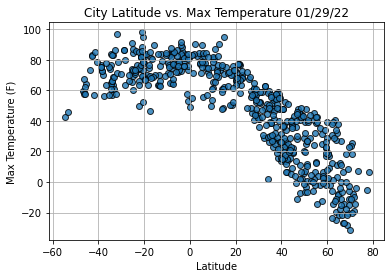

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph prperties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

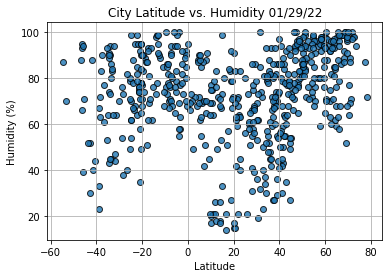

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

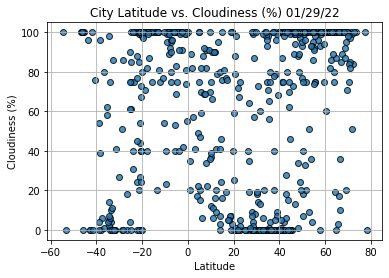

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

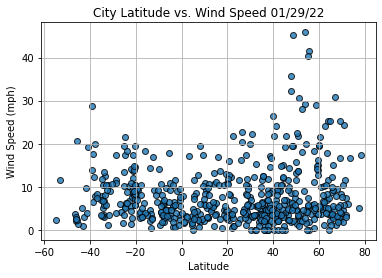

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [47]:
index13 = city_data_df.loc[13]
index13

City                       Hobart
Country                        AU
Date          2022-01-30 04:08:47
Lat                      -42.8794
Lng                      147.3294
Max Temp                    83.01
Humidity                       52
Cloudiness                      0
Wind Speed                   1.01
Name: 13, dtype: object

In [48]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,San Patricio,US,2022-01-30 04:08:43,28.0170,-97.5169,57.04,55,9,8.39
3,Albany,US,2022-01-30 04:05:24,42.6001,-73.9662,6.75,55,100,8.99
4,Yellowknife,CA,2022-01-30 04:08:44,62.4560,-114.3525,-14.58,82,86,5.01
6,Severo-Kurilsk,RU,2022-01-30 04:08:45,50.6789,156.1250,25.11,88,100,13.62
7,Jamestown,US,2022-01-30 04:08:45,42.0970,-79.2353,6.71,84,0,4.61


In [49]:
# Create Northern Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,San Patricio,US,2022-01-30 04:08:43,28.0170,-97.5169,57.04,55,9,8.39
3,Albany,US,2022-01-30 04:05:24,42.6001,-73.9662,6.75,55,100,8.99
4,Yellowknife,CA,2022-01-30 04:08:44,62.4560,-114.3525,-14.58,82,86,5.01
6,Severo-Kurilsk,RU,2022-01-30 04:08:45,50.6789,156.1250,25.11,88,100,13.62
7,Jamestown,US,2022-01-30 04:08:45,42.0970,-79.2353,6.71,84,0,4.61


In [50]:
# Create Southern Hemisphere DataFrame
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maumere,ID,2022-01-30 04:08:43,-8.6199,122.2111,82.98,78,100,8.03
2,Atuona,PF,2022-01-30 04:08:44,-9.8000,-139.0333,78.08,76,23,14.14
5,Arraial Do Cabo,BR,2022-01-30 04:08:44,-22.9661,-42.0278,73.44,95,100,10.16
8,Chicama,PE,2022-01-30 04:08:45,-7.8447,-79.1469,64.94,76,100,5.99
9,Boyolangu,ID,2022-01-30 04:08:46,-8.1181,111.8935,84.79,70,89,6.08


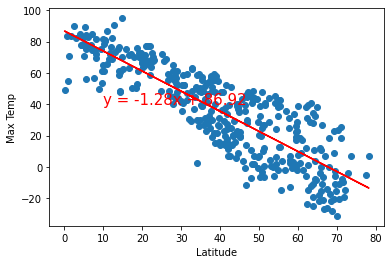

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", "Max Temp",(10,40))

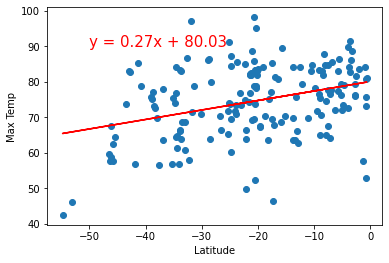

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature", "Max Temp",(-50,90))

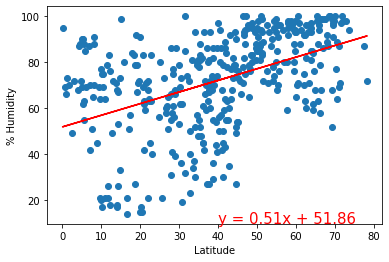

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

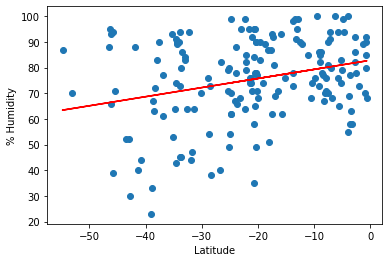

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

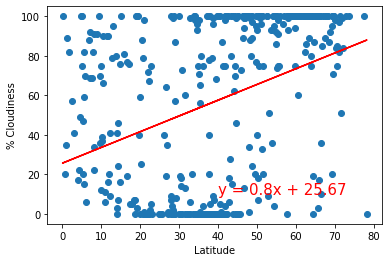

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for % Cloudiness", "% Cloudiness",(40,10))

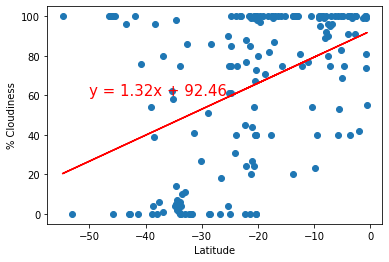

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

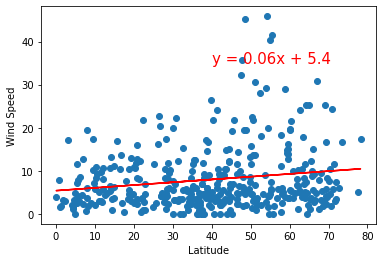

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

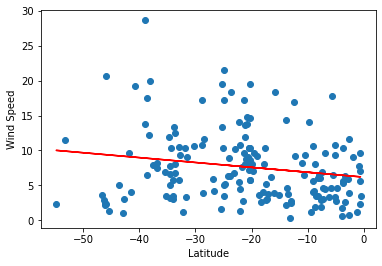

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))